LOAD DATASET AND MAKE FOLDER TO SAVE IT

In [1]:
import pandas as pd
import cv2
from deepface import DeepFace
import numpy as np
file = pd.read_csv("dataset/file/sample.csv")
file.tail(3)

,Nomor,Foto ke-,Total,URL
15093,496,30,15094,https://firebasestorage.googleapis.com/v0/b/pp...
15094,496,31,15095,https://firebasestorage.googleapis.com/v0/b/pp...
15095,496,32,15096,https://firebasestorage.googleapis.com/v0/b/pp...


In [2]:
from urllib.request import urlretrieve
import csv

URL = file.URL
path = csv.reader(URL)
img_count = 1
for data in path:
    urlretrieve(data[0], 'dataset/images/image_{0}.jpg'.format(img_count))
    img_count +=1



KeyboardInterrupt: 

SHOW IMAGES 

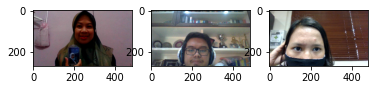

In [31]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os

plt.subplot(1,3,1)
image = mpimg.imread("dataset/images/image_33.jpg")
plt.imshow(image)
plt.subplot(1,3,2)
image = mpimg.imread("dataset/images/image_100.jpg")
plt.imshow(image)
plt.subplot(1,3,3)
image = mpimg.imread("dataset/images/image_200.jpg")
plt.imshow(image)


LABELING IMAGE

In [5]:

imgpath = 'dataset/images/image_33.jpg' 
image = cv2.imread(imgpath)
type(image)

numpy.ndarray

In [6]:
analysis = DeepFace.analyze(image, actions = ["emotion","dominant_emotion"])
print(analysis)

Action: dominant_emotion: 100%|██████████| 2/2 [00:07<00:00,  3.95s/it]


{'emotion': {'angry': 3.0703747612461307, 'disgust': 0.00024100312729786398, 'fear': 0.0020218974282279942, 'happy': 95.36537500413507, 'sad': 0.8644390435182479, 'surprise': 0.007021394103643692, 'neutral': 0.6905279999541044}, 'dominant_emotion': 'happy', 'region': {'x': 182, 'y': 29, 'w': 131, 'h': 131}}


In [7]:
print(analysis['dominant_emotion']) 

happy


In [92]:
import glob

def load_images(pathdir):
    angry = 1
    sad = 1
    fear = 1
    disgust = 1
    surprise = 1
    neutral = 1
    happy = 1
    undefined = 1
    for img in glob.glob(pathdir):
        image = cv2.imread(img)
        analysis = DeepFace.analyze(image, actions = ["emotion","dominant_emotion"])
        if analysis['dominant_emotion'] == 'angry' :
            os.chdir('dataset/train/angry')
            cv2.imwrite('angry_{0}.jpg'.format(angry), image)
            angry +=1
        elif analysis['dominant_emotion'] == 'happy' :
            os.chdir('dataset/train/happy')
            cv2.imwrite('happy_{0}.jpg'.format(happy), image)
            happy +=1
        elif analysis['dominant_emotion'] == 'fear' :
            os.chdir('dataset/train/fear')
            cv2.imwrite('fear_{0}.jpg'.format(fear), image)
            fear +=1
        elif analysis['dominant_emotion'] == 'sad' :
            os.chdir('dataset/train/sad')
            cv2.imwrite('sad_{0}.jpg'.format(sad), image)
            sad +=1
        elif analysis['dominant_emotion'] == 'disgust' :
            os.chdir('dataset/train/disgust')
            cv2.imwrite('disgust_{0}.jpg'.format(disgust), image)
            disgust +=1  
        elif analysis['dominant_emotion'] == 'surprise' :
            os.chdir('dataset/train/surprise')
            cv2.imwrite('surprise_{0}.jpg'.format(surprise), image)
            surprise +=1
        elif analysis['dominant_emotion'] == 'neutral' :
            os.chdir('dataset/train/neutral')
            cv2.imwrite('neutral_{0}.jpg'.format(neutral), image)
            neutral +=1
        else :
            os.chdir('dataset/train/undefined')
            cv2.imwrite('undefined_{0}.jpg'.format(undefined), image)
            undefined +=1


        

In [93]:
load_images("dataset/images/*.jpg")